In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython.display import HTML, Video
from moviepy.editor import VideoFileClip
from helper_functions.PerspectiveTransformation import *
from helper_functions.LaneLines import *

In [10]:
images = []
images.append(mpimg.imread('test_images/challenge_video_frame_1.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_100.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_110.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_120.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_130.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_140.jpg'))

In [11]:
images1 = []
images1.append(mpimg.imread('test_images/project_video_frame_1032.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_1048.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_235.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_810.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_551.jpg'))

In [12]:
images2 = []
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_10.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_100.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_200.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_300.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_400.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_500.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_600.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_700.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_800.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_900.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1000.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1100.jpg'))

In [13]:
def plot(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    f = plt.figure(figsize=(24, 9))
    ax1 = f.add_subplot(1, 3, 1)
    ax1.imshow(hls[:,:,0], cmap='gray', vmin=0, vmax=255)
    ax2 = f.add_subplot(1, 3, 2)
    ax2.imshow(hls[:,:,1], cmap='gray', vmin=0, vmax=255)
    ax3 = f.add_subplot(1, 3, 3)
    ax3.imshow(hls[:,:,2], cmap='gray', vmin=0, vmax=255)
    plt.figure()
    plt.imshow(img)

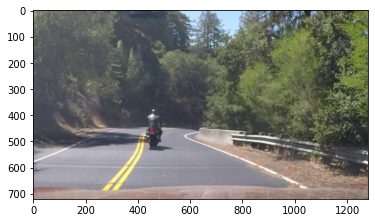

In [14]:
img = images2[2]
birdeye = PerspectiveTransformation()
plt.imshow(img)

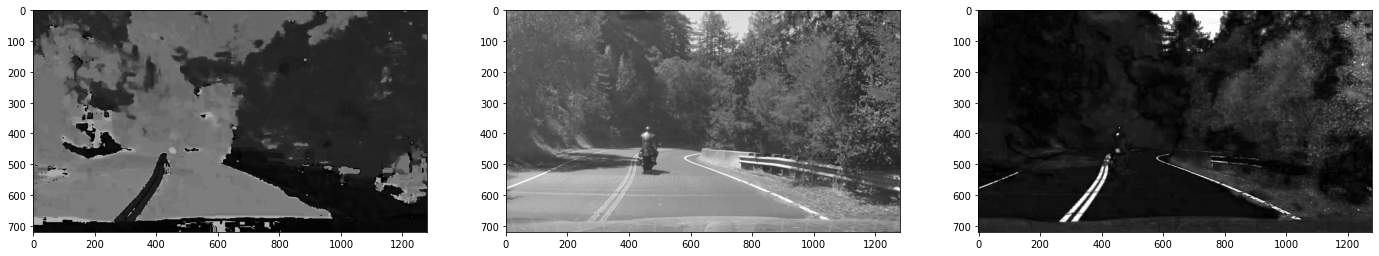

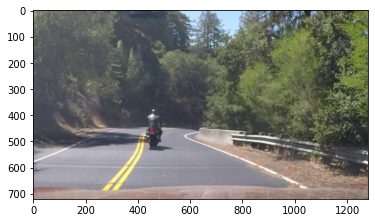

In [15]:
plot(img)

In [16]:
def threshold_rel(img, lo, hi):
    vmin = np.min(img)
    vmax = np.max(img)
    
    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

def threshold_abs(img, lo, hi):
    return np.uint8((img >= lo) & (img <= hi)) * 255

In [21]:
def test(img):
    tmp = birdeye.forward(img)
    tmp = np.copy(img)
    hls = cv2.cvtColor(tmp, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(tmp, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]
    
    f = plt.figure(figsize=(24, 16))
    # ax1 = f.add_subplot(2, 2, 1)
    # ax1.imshow(tmp)
    ax1 = f.add_subplot(2, 2, 1)
    # ax1.imshow(threshold_rel(h_channel, 0.8, 1.0), vmin=0, vmax=255, cmap='gray')
    ax1.imshow(threshold_abs(h_channel, 20, 30), vmin=0, vmax=255, cmap='gray')
    ax2 = f.add_subplot(2, 2, 2)
    ax2.imshow(threshold_rel(l_channel, 0.8, 1.0), vmin=0, vmax=255, cmap='gray')
    
    ax3 = f.add_subplot(2, 2, 3)
    ax3.imshow(threshold_rel(s_channel, 0.5, 0.8), vmin=0, vmax=255, cmap='gray')
    
    ax4 = f.add_subplot(2, 2, 4)
    res = threshold_abs(h_channel, 20, 30)
    res &= threshold_rel(v_channel, 0.7, 1.0)
    ax4.imshow(res, vmin=0, vmax=255, cmap='gray')

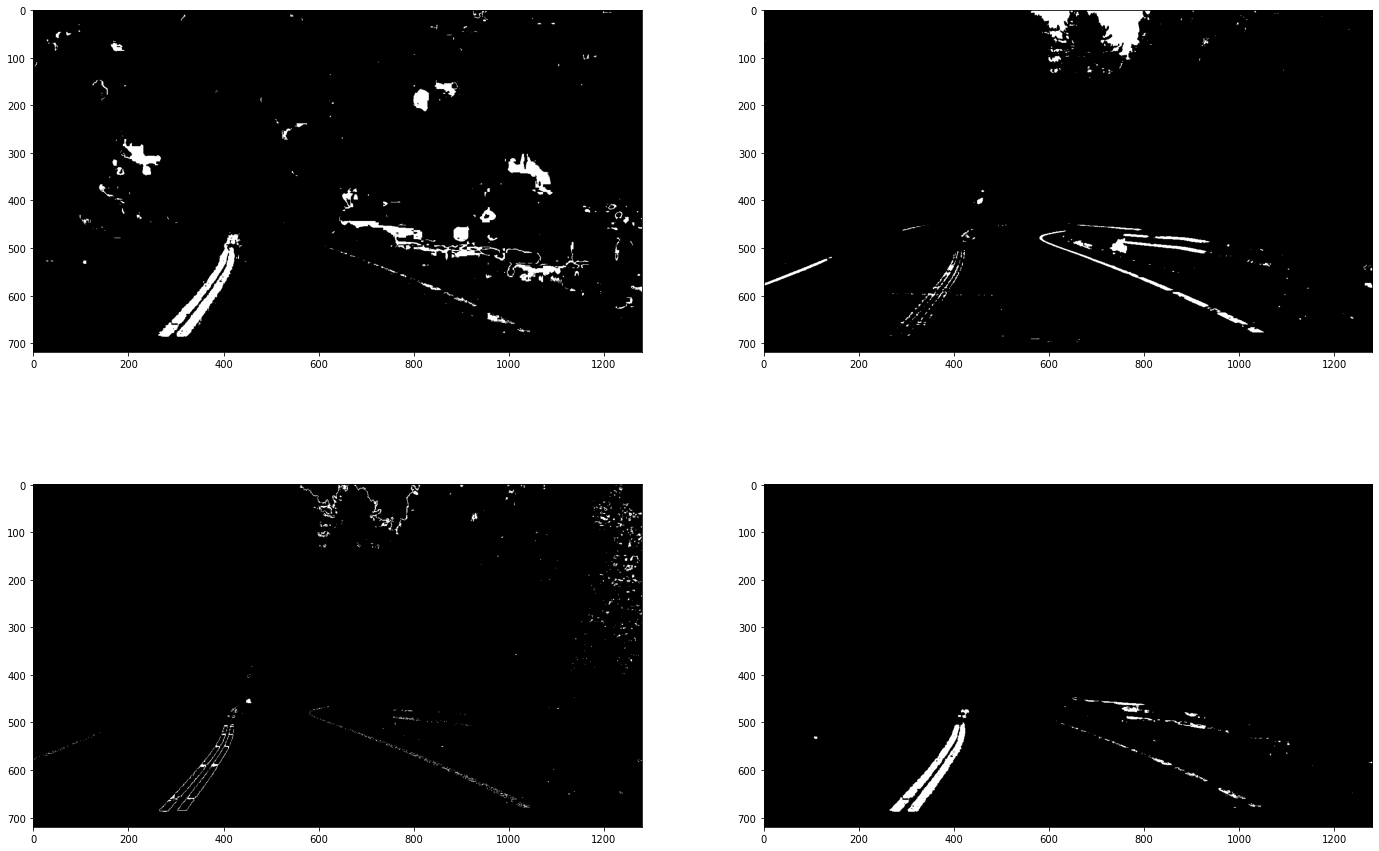

In [22]:
test(images2[2])

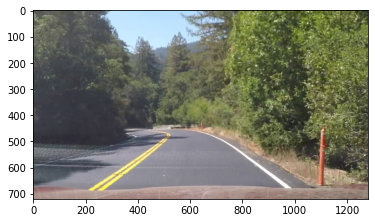

In [23]:
img = images2[1]
plt.imshow(img)

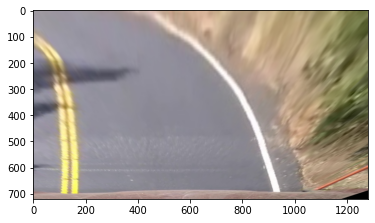

In [24]:
img1 = birdeye.forward(img)
plt.imshow(img1)

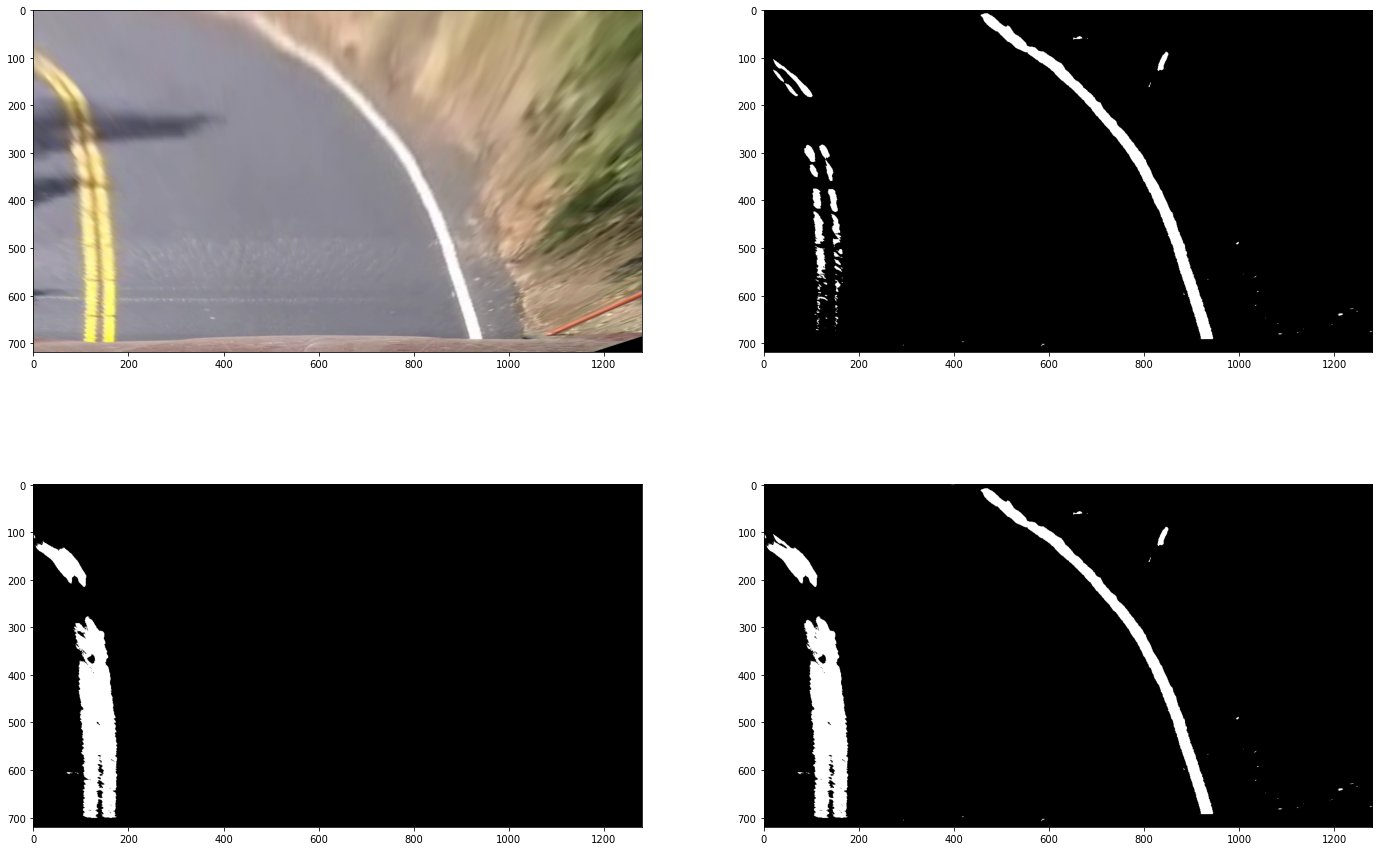

In [25]:
hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(2, 2, 1)
ax1.imshow(img1)
ax2 = f.add_subplot(2, 2, 2)
right_lane = threshold_rel(l_channel, 0.8, 1.0)
# right_lane[:,:750] = 0
ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')

ax3 = f.add_subplot(2, 2, 3)
left_lane = threshold_abs(h_channel, 20, 30)
left_lane &= threshold_rel(v_channel, 0.7, 1.0)
left_lane[:,550:] = 0
ax3.imshow(left_lane, vmin=0, vmax=255, cmap='gray')

img2 = left_lane | right_lane
ax4 = f.add_subplot(2, 2, 4)
ax4.imshow(img2, vmin=0, vmax=255, cmap='gray')

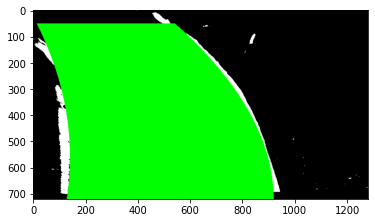

In [26]:
lanelines = LaneLines()
img3 = lanelines.forward(img2)
plt.imshow(img3)

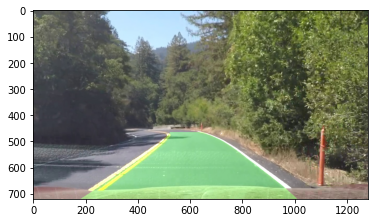

In [27]:
img4 = birdeye.backward(img3)
out_img = cv2.addWeighted(img, 1, img4, 0.3, 0)
plt.imshow(out_img)

In [28]:
birdeye = PerspectiveTransformation()
lanelines = LaneLines()
def process_image(img):
    # step 1
    img1 = birdeye.forward(img)
#     img1 = np.copy(img)
    
    # step 2
    hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]

    right_lane = threshold_rel(l_channel, 0.8, 1.0)
    right_lane[:,:750] = 0

    left_lane = threshold_abs(h_channel, 20, 30)
    left_lane &= threshold_rel(v_channel, 0.7, 1.0)
    left_lane[:,550:] = 0

    img2 = left_lane | right_lane
    
#     img2 = birdeye.forward(img2)
    
    # step 3
    img3 = lanelines.forward(img2)
    
    # step 4
    img4 = birdeye.backward(img3)
    out_img = cv2.addWeighted(img, 1, img4, 1, 0)
    
    return out_img

In [ ]:
tmp = process_image(images[4])
plt.imshow(tmp)

In [27]:
clip = VideoFileClip("challenge_video.mp4")

In [23]:
Video("challenge_video.mp4")

In [28]:
out_clip = clip.fl_image(process_image)
out_clip.write_videofile("output_videos/tmp.mp4", audio=False)


t:   0%|                                                                             | 0/485 [00:00<?, ?it/s, now=None]

Moviepy - Building video output_videos/tmp.mp4.
Moviepy - Writing video output_videos/tmp.mp4



Moviepy - Done !
Moviepy - video ready output_videos/tmp.mp4


In [29]:
Video("output_videos/tmp.mp4")